In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [149]:
df = pd.read_csv(r'/Users/jhonatatirloni/Desktop/g05-ia-seguranca-digital/src/data/processed/gold/golpebr_dataset.csv',
                 sep='|')

In [132]:
df['cibercrime'].value_counts()

cibercrime
S    335
N    104
Name: count, dtype: int64

In [133]:
df = df.loc[(df['cibercrime'] == 'S') | (df['cibercrime'] == 'N')]

In [134]:
df['cibercrime'] = np.where(df['cibercrime'] == 'S', 1, 0).copy()

In [135]:
x = df['text']
y = df['cibercrime']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)


------
# Random Forest Classifier (rfc)

In [137]:
paramgrid_rfc = {
    'tfidf_vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
    'clf_rfc__n_estimators':[200, 100, 50],
    'clf_rfc__max_depth':[150, 100, 50]
}

pipeline_rfc = Pipeline(
    [
        ('tfidf_vectorizer', TfidfVectorizer()),
        ('clf_rfc', RandomForestClassifier(random_state=42))
    ]
)


In [138]:
grid = GridSearchCV(
    pipeline_rfc,
    paramgrid_rfc,
    cv=5,
    scoring='precision'
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                                       ('clf_rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf_rfc__max_depth': [150, 100, 50],
                         'clf_rfc__n_estimators': [200, 100, 50],
                         'tfidf_vectorizer__ngram_range': [(1, 1), (1, 2),
                                                           (1, 3)]},
             scoring='precision')

In [139]:

print("Melhores parâmetros:", grid.best_params_)
print("\nRelatório de classificação:")
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parâmetros: {'clf_rfc__max_depth': 150, 'clf_rfc__n_estimators': 200, 'tfidf_vectorizer__ngram_range': (1, 2)}

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.78      1.00      0.88       103

    accuracy                           0.78       132
   macro avg       0.39      0.50      0.44       132
weighted avg       0.61      0.78      0.68       132



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

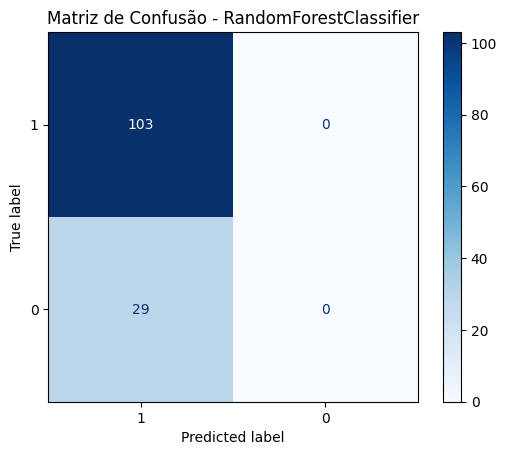

In [140]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='Blues')

plt.title("Matriz de Confusão - RandomForestClassifier")
plt.show()

-----
# Support Vector Machine (svm)

In [141]:
paramgrid_svm = {
    'tfidf_vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
    'clf_svm__C':[0.1, 1, 10],
    'clf_svm__kernel':['linear', 'rbf']
}

pipeline_svm = Pipeline(
    [
        ('tfidf_vectorizer', TfidfVectorizer()),
        ('clf_svm', SVC(random_state=42))
    ]
)


In [142]:
grid = GridSearchCV(
    pipeline_svm,
    paramgrid_svm,
    cv=5,
    scoring='precision'
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                                       ('clf_svm', SVC(random_state=42))]),
             param_grid={'clf_svm__C': [0.1, 1, 10],
                         'clf_svm__kernel': ['linear', 'rbf'],
                         'tfidf_vectorizer__ngram_range': [(1, 1), (1, 2),
                                                           (1, 3)]},
             scoring='precision')

In [143]:

print("Melhores parâmetros:", grid.best_params_)
print("\nRelatório de classificação:")
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parâmetros: {'clf_svm__C': 10, 'clf_svm__kernel': 'linear', 'tfidf_vectorizer__ngram_range': (1, 2)}

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        29
           1       0.78      0.99      0.88       103

    accuracy                           0.78       132
   macro avg       0.64      0.51      0.47       132
weighted avg       0.72      0.78      0.70       132



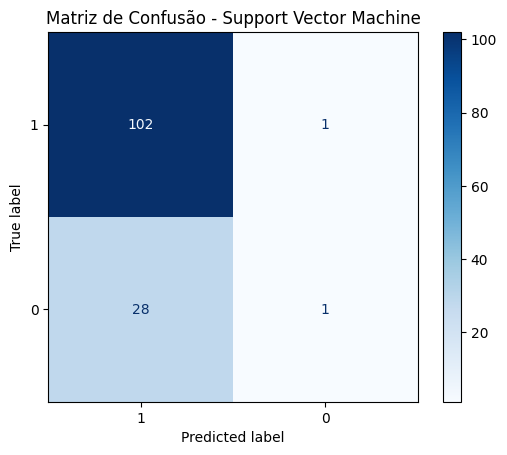

In [144]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='Blues')

plt.title("Matriz de Confusão - Support Vector Machine")
plt.show()

-----
# Logistic Regression (lr)

In [145]:
paramgrid_lr = {
    'tfidf_vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
    'clf_lr__C':[0.1, 1, 10]
}

pipeline_lr = Pipeline(
    [
        ('tfidf_vectorizer', TfidfVectorizer()),
        ('clf_lr', LogisticRegression(random_state=42))
    ]
)


In [146]:
grid = GridSearchCV(
    pipeline_lr,
    paramgrid_lr,
    cv=5,
    scoring='precision'
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                                       ('clf_lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf_lr__C': [0.1, 1, 10],
                         'tfidf_vectorizer__ngram_range': [(1, 1), (1, 2),
                                                           (1, 3)]},
             scoring='precision')

In [147]:

print("Melhores parâmetros:", grid.best_params_)
print("\nRelatório de classificação:")
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parâmetros: {'clf_lr__C': 10, 'tfidf_vectorizer__ngram_range': (1, 1)}

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.33      0.03      0.06        29
           1       0.78      0.98      0.87       103

    accuracy                           0.77       132
   macro avg       0.56      0.51      0.47       132
weighted avg       0.68      0.77      0.69       132



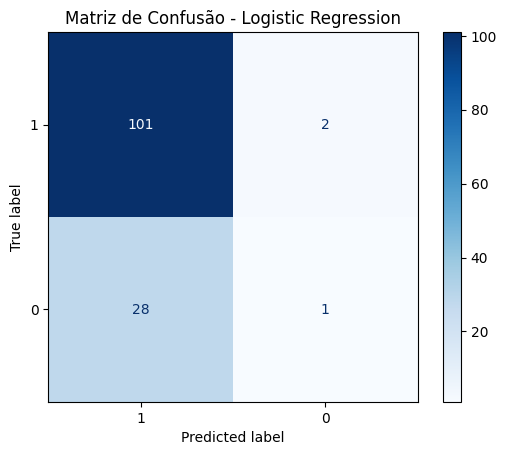

In [148]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='Blues')

plt.title("Matriz de Confusão - Logistic Regression")
plt.show()